# Explanation

- [Video on Udemy](https://www.udemy.com/machinelearning/learn/lecture/6456840)
- Algorithm [photo](https://github.com/DmitryPoliuha/machine-learning-course/blob/master/Part%206%20-%20Reinforcement%20Learning/Thompson%20Sampling/Thompson_Sampling_Slide.png)
- The Multi-armed bandit Problem [video on Udemy](https://www.udemy.com/machinelearning/learn/lecture/6456816)
- Algorithm comparison: UCB vs Thompson Sampling [video on Udemy](https://www.udemy.com/machinelearning/learn/lecture/6468288)

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
dataset.head(10)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


## Implementing Thompson Sampling

In [4]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
total_reward = sum(numbers_of_rewards_1)
total_reward

2601

## Visualising the Results

Text(0, 0.5, 'Number of time each ad was selected')

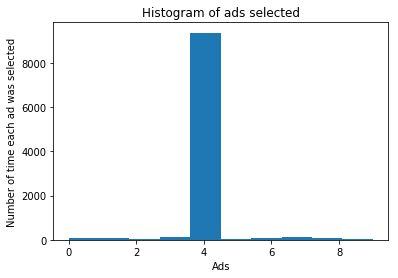

In [5]:
plt.hist(ads_selected)
plt.title("Histogram of ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of time each ad was selected")